In [1]:
%matplotlib inline
import math
import numpy as np
from matplotlib import pyplot as plt

###Linear Regression

In [2]:
#     for row in range(len(A)-2, -1, -1):
#         print(row)
#         c= newA[row][2]/newA[2,2]
#         newA[row] = newA[row]-(c*newA[2])

#     for row in range(1,len(A)):
#         c = newA[row][0]/newA[0,0]
#         newA[row] = newA[row]-(c*newA[0])
#     for row in range(2,len(A)):
#         c = newA[row][1]/newA[1,1]
#         newA[row] = newA[row]-(c*newA[1])
#         for col in range(len(A[i])):
def solveSysEq(A, B):
    def forward(A, B):
        newA = A.copy()
        newB = B.copy()
        for pivot_row in range(len(A)):
            for pivot_elim in range(pivot_row+1,len(A)):
                c = newA[pivot_elim][pivot_row]/newA[pivot_row,pivot_row]
                newA[pivot_elim] = newA[pivot_elim]-(c*newA[pivot_row])
                newB[pivot_elim] = newB[pivot_elim]-(c*newB[pivot_row])
        for pivot_row in range(len(A)-1, -1, -1):
            for pivot_elim in range(pivot_row-1, -1, -1):
                c = newA[pivot_elim][pivot_row]/newA[pivot_row,pivot_row]
                newA[pivot_elim] = newA[pivot_elim]-(c*newA[pivot_row])
                newB[pivot_elim] = newB[pivot_elim]-(c*newB[pivot_row])
        return newA, newB
    def backward(A, B):
        newA = A.copy()
        newB = B.copy()
        for pivot_row in range(len(A)):
            newB[pivot_row]=newB[pivot_row]/newA[pivot_row][pivot_row]

        return newB
    
    Ap, Bp =forward(A,B)
    return backward(Ap, Bp)


# A = np.array(
# [
#     [3., 2, 1],
#     [1,-1,-1],
#     [1,10,-20],
# ]
# )
# B = np.array([10.,-4,-39])
A = np.array(
[
    [3., 2],
    [1,-1]
]
)
B = np.array([10.,-4])
np.linalg.solve(A,B)
print(A,B)
print (B)
solveSysEq(A,B)


[[ 3.  2.]
 [ 1. -1.]] [ 10.  -4.]
[ 10.  -4.]


array([ 0.4,  4.4])

In [83]:
#cheat
np.linalg.solve(A,B)


array([ 1.,  2.,  3.])

1) Load the linear data using `np.loadtxt`. The first column is `x` and the second column is `y`.

In [85]:
data_x,data_y = np.loadtxt('linear.txt')

2) Plot `data_x` vs `data_y`

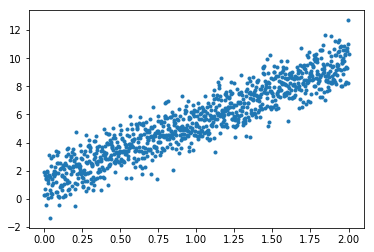

In [86]:
plt.plot(data_x, data_y, '.')

3) What what is the equation for a striaght line?

4) What is the difference between a "good line" and a "bad line"?

5) What are we trying to adjust to minimize the $\chi^2$?

6) How do we findind the minimum of $\chi^2$? Whare are they?

In [89]:
np.array([1,2,3])**2

array([1, 4, 9])

7) Find the best slope and the best intercept.

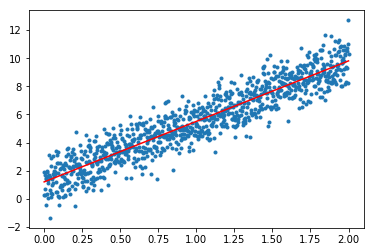

In [105]:
newX = np.array(data_x)

newY = np.array(data_y)
sumX = sum(newX)
n = len(data_x)
    
A = np.array(
[
    [sum(newX**2), sumX],
    [sumX, n]
])
B = np.array([sum(newX*newY), sum(newY)])
a,b =solveSysEq(A,B)

def f(x, a, b):
    return a*x + b
plt.plot(data_x, data_y, '.')
xs = np.linspace(0,2,1000)
ys = [f(x,a,b) for x in xs]
plt.plot(xs,ys,color="red")

8) Plot the line along with the data point to verify that you actually got the right answer.

9) What is your prediction for the value of `y` when `x`=3.0?

###Generalization

The technique we learn above of finding the parameter that minimize the $\chi^2$ does not limit you to just a straight line model. Let us use it for a more general problem.

1) Open parabola.txt and plot it. Again the first column is `x` and second column is `y`.

In [106]:
para_x,para_y = np.loadtxt('parabola.txt')

2) What is the general form for parabola?

3) What is the difference between a "good line" and a "bad line"?

4) What are we trying to minimize in order to find the best parabola?

5) Find the best fitted parabola and plot to verify.

[[  1.25500834e+05   1.86162197e-12   8.35001668e+03]
 [  1.86162197e-12   8.35001668e+03  -2.16715534e-13]
 [  8.35001668e+03  -2.16715534e-13   1.00000000e+03]]
[-55214.48507708   2553.92552865  -3239.53646967]


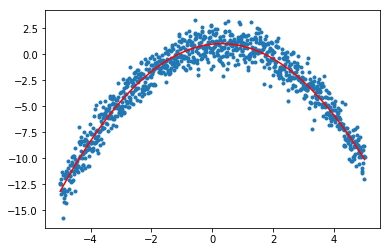

In [116]:
newpX = np.array(para_x)

newpY = np.array(para_y)
sumpX = sum(newpX)
sump2X = sum(newpX**2)
sump3X = sum(newpX**3)
n = len(para_x)
    
A = np.array(
[
    [sum(newpX**4), sump3X, sump2X],
    [sump3X, sump2X, sumpX],
    [sump2X, sumpX, n]
])
B = np.array([sum((newpX**2)*newpY), sum(newpX*newpY), sum(newpY)])
print(A)
print(B)
a,b,c =solveSysEq(A,B)
def f(x, a, b,c):
    return a*(x**2) + b*x +c
plt.plot(para_x, para_y, '.')
xs = np.linspace(-5,5,1000)
ys = [f(x,a,b,c) for x in xs]
plt.plot(xs,ys,color="red")

###Extra

Find something interesting from http://www.stat.ufl.edu/~winner/datasets.html and make some prediction.